<a href="https://colab.research.google.com/github/theAkhileshRai/ComputerVision/blob/master/VGG11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#VGGNet

!pip install -U --pre mxnet-cu101mkl  # updating mxnet to at least v1.6
!pip install git+https://github.com/d2l-ai/d2l-en # installing d2l

Requirement already up-to-date: mxnet-cu101mkl in /usr/local/lib/python3.6/dist-packages (1.6.0)
  Cloning https://github.com/d2l-ai/d2l-en to /tmp/pip-req-build-2sua4x77
  Running command git clone -q https://github.com/d2l-ai/d2l-en /tmp/pip-req-build-2sua4x77
  Created wheel for d2l: filename=d2l-0.11.4-cp36-none-any.whl size=31756 sha256=16246cce31e1d6a9f9568ad8b70399eb925e21d44631f00f74c7fc4a7d181e20
  Stored in directory: /tmp/pip-ephem-wheel-cache-ussg_78z/wheels/82/6f/b8/8422c7ed664272685e3d139b127f89df39d934704a14b2156c
Successfully built d2l


In [0]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()

def VGGBlock(numConv,numChannels):
  blk = nn.Sequential()
  for _ in range(numConv):
    blk.add(nn.Conv2D(numChannels,kernel_size=3,padding = 1,activation='relu'))
  blk.add(nn.MaxPool2D(pool_size = 2,strides=2))
  return blk


In [12]:
VGGBlock(2,64)

Sequential(
  (0): Conv2D(-1 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
  (1): Conv2D(-1 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
  (2): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
)

In [0]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [0]:
#VGGNet
def vgg(conv_arch):
    net = nn.Sequential()
    # The convolutional layer part
    for (num_convs, num_channels) in conv_arch:
        net.add(VGGBlock(num_convs, num_channels))
    # The fully connected layer part
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

net = vgg(conv_arch)

In [15]:
net


Sequential(
  (0): Sequential(
    (0): Conv2D(-1 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
    (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  )
  (1): Sequential(
    (0): Conv2D(-1 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
    (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  )
  (2): Sequential(
    (0): Conv2D(-1 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
    (1): Conv2D(-1 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
    (2): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  )
  (3): Sequential(
    (0): Conv2D(-1 -> 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
    (1): Conv2D(-1 -> 512, kernel_size=(

In [16]:
net.initialize()
X = np.random.uniform(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)


sequential15 output shape:	 (1, 64, 112, 112)
sequential16 output shape:	 (1, 128, 56, 56)
sequential17 output shape:	 (1, 256, 28, 28)
sequential18 output shape:	 (1, 512, 14, 14)
sequential19 output shape:	 (1, 512, 7, 7)
dense6 output shape:	 (1, 4096)
dropout4 output shape:	 (1, 4096)
dense7 output shape:	 (1, 4096)
dropout5 output shape:	 (1, 4096)
dense8 output shape:	 (1, 10)


In [0]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

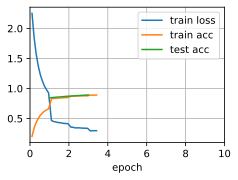

In [0]:
lr, num_epochs, batch_size = 0.05, 10, 128,
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)